In [1]:
import pandas as pd
import numpy as np

def load_dataset(filepath):
    # load data
    # adjust path if necessary
    df = pd.read_csv(filepath)

    # inspect and clean column names
    df.columns = (
        df.columns.str.strip()       # remove extra spaces
                .str.lower()       # lowercase for consistency
                .str.replace(' ', '_')  # replace spaces with underscores
                .str.replace('[^a-zA-Z0-9_]', '', regex=True)  # remove special chars
    )

    # basic overview
    print("Shape:", df.shape)
    print("\nColumn names:\n", df.columns.tolist())
    print("\nMissing values per column:\n", df.isna().sum())

    # handle missing/invalid entries
    # replace empty strings or special missing indicators with NaN
    df.replace(["", "NA", "N/A", "na", "NaN"], np.nan, inplace=True)

    # getcolumn types
    # automatically infer numeric and categorical variables
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    print("\nNumeric columns:", num_cols)
    print("Categorical columns:", cat_cols)

    # convert categorical variables
    # encode categorical columns as category dtype
    for c in cat_cols:
        df[c] = df[c].astype("category")

    # save data
    df.to_csv("questionnaire_cleaned.csv", index=False)
    print("\nCleaned dataframe saved to questionnaire_cleaned.csv")

    return df


In [ ]:
# pre-survey
df = load_dataset("./preliminary-analysis/survey-data/pre-survey-12-3.csv")

Shape: (43, 62)

Column names:
 ['startdate', 'enddate', 'status', 'ipaddress', 'progress', 'duration_in_seconds', 'finished', 'recordeddate', 'responseid', 'recipientlastname', 'recipientfirstname', 'recipientemail', 'externalreference', 'locationlatitude', 'locationlongitude', 'distributionchannel', 'userlanguage', 'participant_id', 'demographics', 'qid5', 'qid6', 'qid7', 'current_mood_sam_1', 'current_mood_sam_2', 'current_mood_sam_3', 'vas_1', 'vas_2_1', 'gad7_1', 'gad7_2', 'gad7_3', 'gad7_4', 'gad7_5', 'gad7_6', 'gad7_7', 'phq8_1', 'phq8_2', 'phq8_3', 'phq8_4', 'phq8_5', 'phq8_6', 'phq8_7', 'phq8_8', 'staiy2_1', 'staiy2_2', 'staiy2_3', 'staiy2_4', 'staiy2_5', 'staiy2_6', 'staiy2_7', 'staiy2_8', 'staiy2_9', 'staiy2_10', 'staiy2_11', 'staiy2_12', 'staiy2_13', 'staiy2_14', 'staiy2_15', 'staiy2_16', 'staiy2_17', 'staiy2_18', 'staiy2_19', 'staiy2_20']

Missing values per column:
 startdate    0
enddate      0
status       0
ipaddress    0
progress     0
            ..
staiy2_16    4
st

In [ ]:
# post-survey
df_2 = load_dataset("./preliminary-analysis/survey-data/post-quest-12-3.csv")

Shape: (35, 92)

Column names:
 ['startdate', 'enddate', 'status', 'ipaddress', 'progress', 'duration_in_seconds', 'finished', 'recordeddate', 'responseid', 'recipientlastname', 'recipientfirstname', 'recipientemail', 'externalreference', 'locationlatitude', 'locationlongitude', 'distributionchannel', 'userlanguage', 'participant_id', 'staisf_1', 'staisf_2', 'staisf_3', 'staisf_4', 'staisf_5', 'staisf_6', 'current_mood_sam_1', 'current_mood_sam_2', 'current_mood_sam_3', 'wemwbs_1', 'wemwbs_2', 'wemwbs_3', 'wemwbs_4', 'wemwbs_5', 'wemwbs_6', 'wemwbs_7', 'wemwbs_8', 'wemwbs_9', 'wemwbs_10', 'wemwbs_11', 'wemwbs_12', 'wemwbs_13', 'wemwbs_14', 'bfne_1', 'bfne_2', 'bfne_3', 'bfne_4', 'bfne_5', 'bfne_6', 'bfne_7', 'bfne_8', 'bfne_9', 'bfne_10', 'bfne_11', 'bfne_12', 'ehi_1', 'ehi_2', 'ehi_3', 'ehi_4', 'ehi_5', 'ehi_6', 'ehi_7', 'ehi_8', 'ehi_9', 'ehi_10', 'rosenberg_1', 'rosenberg_2', 'rosenberg_3', 'rosenberg_4', 'rosenberg_5', 'rosenberg_6', 'rosenberg_7', 'rosenberg_8', 'rosenberg_9', 'ro

# **STAI-Y2** (State-Trait Anxiety Inventory - Form Y2, Trait Anxiety)

**Description:** "A number of statements which people have used to describe themselves are given below. Read each statement and then select the appropriate number to the right of the statement to indicate how you generally feel."

**BOLDED items will be reverse-scored (e.g 1 = 4, 2 = 3, etc)**

**1. I feel pleasant.**  
2. I feel nervous and restless.  
**3. I feel satisfied with myself.**  
4. I wish I could be as happy as others seem to be.  
5. I feel like a failure.  
**6. I feel rested.**  
**7. I am "calm, cool, and collected."**  
8. I feel that difficulties are piling up so that I cannot overcome them.  
9. I worry too much over something that does not really matter.  
**10. I am happy.**     
11.	I have disturbing thoughts.  
12.	I lack self-confidence.   
**13. I feel secure.**      
**14. I make decisions easily.**    
15.	I feel inadequate.  
**16.	I am content.**  
17.	Some unimportant thought runs through my mind and bothers me.  
18.	I take disappointments so keenly that I can't put them out of my mind.  
**19.	I am a steady person.**  
20.	I get in a state of tension or turmoil as I think over my recent concerns and interests.  

**Scoring cut-offs used:**  
* 20-37: low anxiety  
* 38-44: moderate anxiety  
* 45-80: high anxiety  

In [5]:
# format and cast all survey responses to numeric type (int)
pre_quest_df = df.drop([0, 1]).reset_index(drop=True)

In [6]:
# format and cast all survey responses to numeric type (int)
post_quest_df = df_2.drop([0, 1]).reset_index(drop=True)

In [7]:
post_quest_df.columns

Index(['startdate', 'enddate', 'status', 'ipaddress', 'progress',
       'duration_in_seconds', 'finished', 'recordeddate', 'responseid',
       'recipientlastname', 'recipientfirstname', 'recipientemail',
       'externalreference', 'locationlatitude', 'locationlongitude',
       'distributionchannel', 'userlanguage', 'participant_id', 'staisf_1',
       'staisf_2', 'staisf_3', 'staisf_4', 'staisf_5', 'staisf_6',
       'current_mood_sam_1', 'current_mood_sam_2', 'current_mood_sam_3',
       'wemwbs_1', 'wemwbs_2', 'wemwbs_3', 'wemwbs_4', 'wemwbs_5', 'wemwbs_6',
       'wemwbs_7', 'wemwbs_8', 'wemwbs_9', 'wemwbs_10', 'wemwbs_11',
       'wemwbs_12', 'wemwbs_13', 'wemwbs_14', 'bfne_1', 'bfne_2', 'bfne_3',
       'bfne_4', 'bfne_5', 'bfne_6', 'bfne_7', 'bfne_8', 'bfne_9', 'bfne_10',
       'bfne_11', 'bfne_12', 'ehi_1', 'ehi_2', 'ehi_3', 'ehi_4', 'ehi_5',
       'ehi_6', 'ehi_7', 'ehi_8', 'ehi_9', 'ehi_10', 'rosenberg_1',
       'rosenberg_2', 'rosenberg_3', 'rosenberg_4', 'rosenberg_5'

In [15]:
# cast responses to numeric type (int)
pre_quest_df = df.drop([0, 1]).reset_index(drop=True)

In [16]:
staiy_cols = [col for col in pre_quest_df.columns if col.lower().startswith("staiy")]

for c in staiy_cols:
    pre_quest_df[c] = pre_quest_df[c].str[0]
    
pre_quest_df.columns

Index(['startdate', 'enddate', 'status', 'ipaddress', 'progress',
       'duration_in_seconds', 'finished', 'recordeddate', 'responseid',
       'recipientlastname', 'recipientfirstname', 'recipientemail',
       'externalreference', 'locationlatitude', 'locationlongitude',
       'distributionchannel', 'userlanguage', 'participant_id', 'demographics',
       'qid5', 'qid6', 'qid7', 'current_mood_sam_1', 'current_mood_sam_2',
       'current_mood_sam_3', 'vas_1', 'vas_2_1', 'gad7_1', 'gad7_2', 'gad7_3',
       'gad7_4', 'gad7_5', 'gad7_6', 'gad7_7', 'phq8_1', 'phq8_2', 'phq8_3',
       'phq8_4', 'phq8_5', 'phq8_6', 'phq8_7', 'phq8_8', 'staiy2_1',
       'staiy2_2', 'staiy2_3', 'staiy2_4', 'staiy2_5', 'staiy2_6', 'staiy2_7',
       'staiy2_8', 'staiy2_9', 'staiy2_10', 'staiy2_11', 'staiy2_12',
       'staiy2_13', 'staiy2_14', 'staiy2_15', 'staiy2_16', 'staiy2_17',
       'staiy2_18', 'staiy2_19', 'staiy2_20'],
      dtype='object')

In [17]:
# handle reverse scoring 
staiy_map = {
    '1' : '4', 
    '2' : '3', 
    '3' : '2', 
    '4' : '1', 
}

print(pre_quest_df['staiy2_1'])

staiy_reverse_cols = ['staiy2_1', 'staiy2_3', 'staiy2_6', 'staiy2_7', 'staiy2_10', 'staiy2_13', 'staiy2_14', 'staiy2_16', 'staiy2_19']

for c in staiy_cols:
    if c in staiy_reverse_cols:
        pre_quest_df[c] = pre_quest_df[c].map(staiy_map)
    pre_quest_df = pre_quest_df.dropna()
    pre_quest_df[c] = pre_quest_df[c].astype(int)

print(pre_quest_df['staiy2_1'])

# score each participant by calculating sum
pre_quest_df['staiy2_score'] = pre_quest_df[staiy_cols].sum(axis=1)

# group participants into categories based on sum
def staiy_group(score):
    if score <= 37:
        return 'low'
    elif score >= 38 and score <= 44:
        return 'moderate'
    else:
        return 'high'
    
pre_quest_df['staiy2_anxiety_level'] = pre_quest_df['staiy2_score'].apply(staiy_group)



0       1
1       1
2       1
3       2
4       2
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      2
14      2
15      3
16      3
17      2
18      2
19      3
20      3
21    NaN
22    NaN
23      3
24      2
25      2
26      4
27      3
28      4
29    NaN
30      3
31      3
32      3
33      3
34      3
35      3
36      3
37      3
38      3
39      4
40    NaN
Name: staiy2_1, dtype: object
0     4
1     4
2     4
3     3
4     3
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    3
14    3
15    2
16    2
17    3
18    3
19    2
20    2
23    2
24    3
25    3
26    1
27    2
28    1
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    1
Name: staiy2_1, dtype: int64


0         high
1         high
2         high
3         high
4         high
5     moderate
6     moderate
7     moderate
8     moderate
9         high
10        high
11    moderate
12        high
13        high
14        high
15         low
16        high
17        high
18        high
19        high
20         low
23    moderate
24        high
25        high
26         low
27         low
28         low
30    moderate
31    moderate
32         low
33        high
34        high
35         low
36    moderate
37         low
38         low
39         low
Name: staiy2_anxiety_level, dtype: object
  staiy2_anxiety_level  count
0                 high     18
1                  low     10
2             moderate      9


([<matplotlib.patches.Wedge at 0x16ba61250>,
 [Text(0.04668519887584859, 1.0990088681197812, 'high'),
  Text(-0.7941516843832405, -0.7611327756648388, 'low'),
  Text(0.794151884004243, -0.7611325673839687, 'moderate')],
 [Text(0.025464653932281048, 0.5994593826107897, '48.6%'),
  Text(-0.433173646027222, -0.4151633321808212, '27.0%'),
  Text(0.4331737549114052, -0.4151632185730738, '24.3%')])

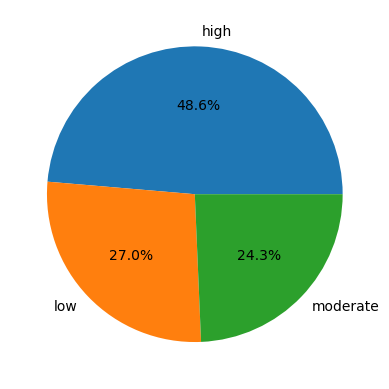

In [18]:
# visualize the data
print(pre_quest_df['staiy2_anxiety_level'])

import matplotlib.pyplot as plt

staiy2_summary = pre_quest_df['staiy2_anxiety_level'].value_counts().reset_index()
print(staiy2_summary)

staiy_fig, staiy_ax = plt.subplots()
staiy_ax.pie(staiy2_summary['count'], labels=staiy2_summary['staiy2_anxiety_level'], autopct='%1.1f%%')

# **GAD-7** (Generalized Anxiety Disorder 7-item Scale)

**Description:** "Over the last 2 weeks, how often have you been bothered by the following problems? Please select one response for each item."

1. Feeling nervous, anxious, or on edge.  
2. Not being able to stop or control worrying.  
3. Worrying too much about different things.  
4. Trouble relaxing.  
5. Being so restless that it is hard to sit still.  
6. Becoming easily annoyed or irritable.  
7. Feeling afraid as if something awful might happen.  

**Scoring cut-offs used:**  
* 0-4: minimal anxiety  
* 5-9: mild anxiety  
* 10-14: moderate anxiety  
* 15-21: severe anxiety


In [19]:
gad_cols = [col for col in pre_quest_df.columns if col.lower().startswith("gad7")]

for c in gad_cols:
    pre_quest_df[c] = pre_quest_df[c].str[0].astype(int)

def gad_group(score):
    if score <= 4:
        return 'minimal'
    elif score >= 5 and score <= 9:
        return 'mild'
    elif score >= 10 and score <= 14:
        return 'moderate'
    else:
        return 'severe'
    
pre_quest_df['gad_score'] = pre_quest_df[gad_cols].sum(axis=1)
pre_quest_df['gad_anxiety_level'] = pre_quest_df['gad_score'].apply(gad_group)
pre_quest_df

,startdate,enddate,status,ipaddress,progress,duration_in_seconds,finished,recordeddate,responseid,recipientlastname,...,staiy2_15,staiy2_16,staiy2_17,staiy2_18,staiy2_19,staiy2_20,staiy2_score,staiy2_anxiety_level,gad_score,gad_anxiety_level
0,2025-10-20 19:54:03,2025-10-20 19:55:18,Survey Preview,*******,100,75,True,2025-10-20 19:55:18,R_7an6KsDAO9SqWyU,*******,...,1,4,1,1,4,1,47,high,0,minimal
1,2025-10-20 19:57:41,2025-10-20 19:58:37,Survey Preview,*******,100,56,True,2025-10-20 19:58:38,R_7814wZ8KdSB38fn,*******,...,2,3,2,2,3,2,50,high,0,minimal
2,2025-10-20 20:02:30,2025-10-20 20:03:39,IP Address,*******,100,68,True,2025-10-20 20:03:39,R_5k24X3RKig6uSYB,*******,...,1,4,1,1,4,1,47,high,0,minimal
3,2025-10-20 20:06:36,2025-10-20 20:07:44,IP Address,*******,100,67,True,2025-10-20 20:07:44,R_5qAsmT2MTMVKVbz,*******,...,2,3,2,2,3,2,49,high,0,minimal
4,2025-10-20 20:56:57,2025-10-20 20:58:04,IP Address,*******,100,67,True,2025-10-20 20:58:04,R_3MMKqFiZdTRftBX,*******,...,2,3,2,2,3,2,49,high,0,minimal
5,2025-10-24 15:56:50,2025-10-24 16:03:41,IP Address,*******,100,411,True,2025-10-24 16:03:41,R_64mbJLX4AhisVPP,*******,...,1,2,2,2,2,2,38,moderate,9,mild
6,2025-10-27 12:49:35,2025-10-27 12:53:41,IP Address,*******,100,245,True,2025-10-27 12:53:41,R_3Hq6PUtgSgUN0HE,*******,...,3,3,2,2,2,1,44,moderate,3,minimal
7,2025-10-28 08:51:06,2025-10-28 08:55:46,IP Address,*******,100,279,True,2025-10-28 08:55:46,R_1dA9sGnGzxQx43d,*******,...,1,2,1,1,2,1,41,moderate,4,minimal
8,2025-10-29 12:49:37,2025-10-29 12:52:24,IP Address,*******,100,166,True,2025-10-29 12:52:24,R_5Y4jxs3t7yyoi3Z,*******,...,2,2,3,2,2,2,40,moderate,7,mild
9,2025-10-30 14:08:24,2025-10-30 14:18:59,IP Address,*******,100,634,True,2025-10-30 14:18:59,R_6c1FrgFNNYsCHBv,*******,...,1,2,2,3,3,2,48,high,6,mild


In [28]:
# standardize aesthetics

# pie charts
pie_props = {'linewidth': 1, 
             'edgecolor' : 'white',
             'linewidth' : 2.5}
text_props = {'fontsize' : 15}
cmap_scheme = 'Oranges'
cmap_depression = 'Purples'

  gad_anxiety_level  count
0           minimal     15
1              mild     13
2          moderate      7
3            severe      2


<BarContainer object of 4 artists>

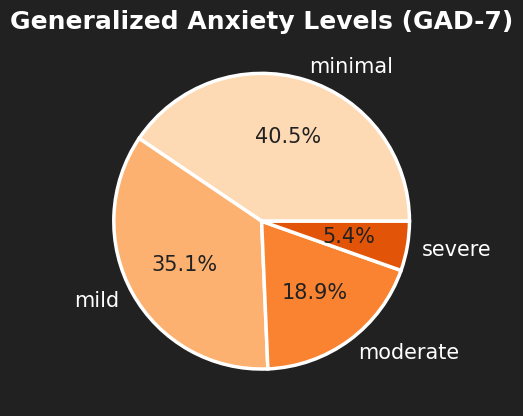

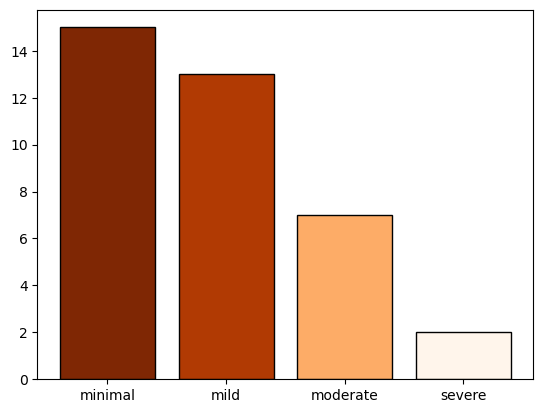

In [21]:
# visualize the data
gad_summary = pre_quest_df['gad_anxiety_level'].value_counts().reset_index()
print(gad_summary)

# pie chart
gad_fig, gad_ax = plt.subplots()
colors = plt.get_cmap(cmap_scheme)(np.linspace(0.2, 0.7, len(gad_summary['count'])))
patches, texts, autotexts = gad_ax.pie(gad_summary['count'], labels=gad_summary['gad_anxiety_level'], 
           autopct='%1.1f%%',
           colors=colors,
           wedgeprops=pie_props, 
           textprops=text_props,
           frame=False)
gad_ax.set_title('Generalized Anxiety Levels (GAD-7)',
                 fontsize=18,
                 color='white',
                 fontweight='bold') 
gad_fig.set_facecolor('#212121')
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('#212121')

# bar chart
gad_bar, gad_bax = plt.subplots()
cmap = plt.get_cmap(cmap_scheme)
norm = plt.Normalize(vmin=gad_summary['count'].min(), vmax=gad_summary['count'].max())
gad_bax.bar(gad_summary['gad_anxiety_level'], gad_summary['count'],
            edgecolor='black',
            color=[cmap(norm(val)) for val in gad_summary['count']])

# **PHQ-8** (Patient Health Questionnaire 8-item depression scale)

**Description:** "Over the last 2 weeks, how often have you been bothered by any of the following problems?"

1. Little interest or pleasure in doing things.  
2. Feeling down, depressed, or hopeless.  
3. Trouble falling or staying asleep, or sleeping too much.  
4. Feeling tired or having little energy.  
5. Poor appetite or overeating.  
6. Feeling bad about yourself - or that you are a failure or have let yourself or your family down.  
7. Trouble concentrating on things, such as reading the newspaper or watching television.  
8. Moving or speaking so slowly that other people could have noticed? Or the opposite - being so fidgety or restless that you have been moving around a lot more than usual.  

**Scoring cut-offs:**  
* <5: minimal depression  
* 5-9: mild depression  
* 10-14: moderate depression  
* 15-19: moderately severe depression  
* 20+: severe depression


In [23]:
phq_cols = [col for col in pre_quest_df.columns if col.lower().startswith("phq")]

for c in phq_cols:
    pre_quest_df[c] = pre_quest_df[c].str[0].astype(int)

def phq_group(score):
    if score <= 5:
        return 'minimal'
    elif score >= 5 and score <= 9:
        return 'mild'
    elif score >= 10 and score <= 14:
        return 'moderate'
    elif score >= 15 and score <= 19:
        return 'moderately severe'
    else:
        return 'severe'
    
pre_quest_df['phq_score'] = pre_quest_df[phq_cols].sum(axis=1)
pre_quest_df['phq_depress_level'] = pre_quest_df['phq_score'].apply(phq_group)
pre_quest_df


AttributeError: Can only use .str accessor with string values!

  phq_depress_level  count
0           minimal     21
1              mild     12
2          moderate      4


<BarContainer object of 3 artists>

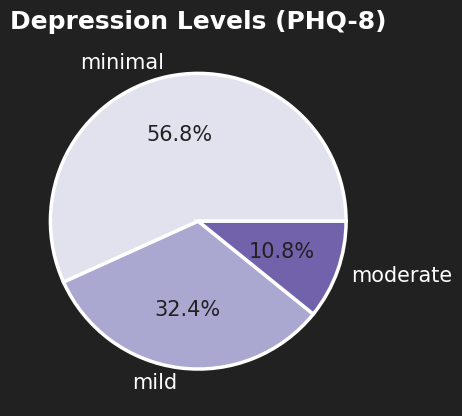

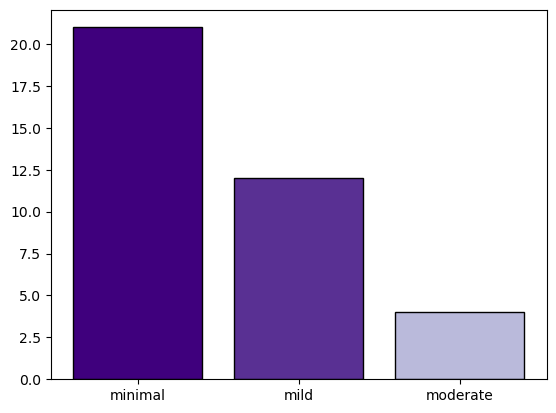

In [30]:
# visualize the data
phq_summary = pre_quest_df['phq_depress_level'].value_counts().reset_index()
print(phq_summary)

# pie chart
phq_fig, phq_ax = plt.subplots()
phq_colors = plt.get_cmap('Purples')(np.linspace(0.2, 0.7, len(phq_summary['count'])))
patches, texts, autotexts = phq_ax.pie(phq_summary['count'], labels=phq_summary['phq_depress_level'], 
           autopct='%1.1f%%',
           wedgeprops=pie_props,
           colors=phq_colors,
           textprops=text_props)
phq_ax.set_title('Depression Levels (PHQ-8)',
                 fontsize=18,
                 color='white',
                 fontweight='bold')
phq_fig.set_facecolor('#212121')
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('#212121')

# bar chart
phq_bar, phq_bax = plt.subplots()
cmap = plt.get_cmap(cmap_depression)
phq_bax.bar(phq_summary['phq_depress_level'], phq_summary['count'],
            color=[cmap(norm(val)) for val in gad_summary['count']],
            edgecolor='black',)

# **SAM** (Self Assessment Manikin)
"Using the scales below, please indicate how you are feeling right now."  

a. **Valence** (Pleasure) (current_mood_sam_1)   
b. **Arousal** (Excitement) (current_mood_sam_2)  
c. **Dominance** (Control) (current_mood_sam_3)  

0     5
1     6
2     4
3     5
4     4
5     7
6     7
7     5
8     5
9     6
10    5
11    5
12    7
13    5
14    4
15    6
16    7
17    7
18    6
19    7
20    5
23    7
24    4
25    5
26    8
27    7
28    5
30    7
31    6
32    6
33    2
34    6
35    7
36    6
37    7
38    6
39    8
Name: current_mood_sam_1, dtype: category
Categories (8, object): ['2', '4', '5', '6', '7', '8', 'Using scales below, please indicate how you a..., '{"ImportId":"QID8_1"}']


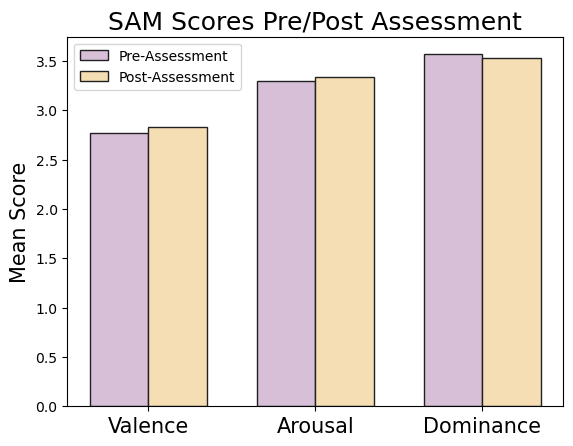

In [25]:
print(pre_quest_df['current_mood_sam_1'])
manikin_df = pd.DataFrame()
manikin_df['pre_valence'] = pre_quest_df['current_mood_sam_1'].cat.codes
manikin_df['pre_arousal'] = pre_quest_df['current_mood_sam_2'].cat.codes
manikin_df['pre_dominance'] = pre_quest_df['current_mood_sam_3'].cat.codes
manikin_df['post_valence'] = post_quest_df['current_mood_sam_1'].cat.codes
manikin_df['post_arousal'] = post_quest_df['current_mood_sam_2'].cat.codes
manikin_df['post_dominance'] = post_quest_df['current_mood_sam_3'].cat.codes
manikin_df = manikin_df.dropna()
manikin_df

sam_avgs = {}
for c in manikin_df.columns:
    sam_avgs[c] = manikin_df[c].mean()

labels = ['Valence', 'Arousal', 'Dominance']
pre_data = [sam_avgs['pre_valence'], sam_avgs['pre_arousal'], sam_avgs['pre_dominance']]
post_data = [sam_avgs['post_valence'], sam_avgs['post_arousal'], sam_avgs['post_dominance']]

x = np.arange(len(labels))
width = 0.35

sam_fig, sam_ax = plt.subplots()

# plot first set of bars
rects1 = sam_ax.bar(x - width/2, pre_data, width, label='Pre-Assessment', 
                    color='thistle', 
                    edgecolor='#212121',
                    linewidth=1)

# plot second set of bars
rects2 = sam_ax.bar(x + width/2, post_data, width, label='Post-Assessment', 
                    color='wheat',
                    edgecolor='#212121',
                    linewidth=1)

sam_ax.set_title('SAM Scores Pre/Post Assessment', fontsize=18)
sam_ax.set_ylabel('Mean Score', fontsize=15)
sam_ax.set_xticks(x, labels, fontsize=15)
sam_ax.legend()


# VAS (Visual Analogue Scale)

[np.float64(5.6), np.float64(5.666666666666667)]
[np.float64(6.454545454545454), np.float64(5.909090909090909)]


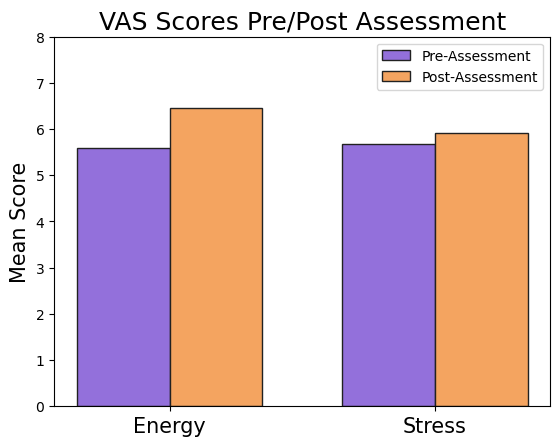

In [26]:
pre_vas_energy = [8, 8, 9, 3, 5, 7, 4, 4, 4, 7, 5, 4, 6, 6, 4]
post_vas_energy = [6, 7, 8, 7, 4, 6, 9, 7, 8, 5, 4]

pre_vas_stress = [7, 9, 8, 7, 7, 6, 1, 4, 2, 6, 7, 5, 3, 9, 4] 
post_vas_stress = [5, 7, 7, 6, 3, 6, 8, 6, 8, 5, 4]

vas_labels = ['Energy', 'Stress']
pre_vas_data = [np.mean(pre_vas_energy), np.mean(pre_vas_stress)]
post_vas_data = [np.mean(post_vas_energy), np.mean(post_vas_stress)]

print(pre_vas_data)
print(post_vas_data)

vas_x = np.arange(len(vas_labels))
vas_width = 0.35

vas_fig, vas_ax = plt.subplots()

# plot first set of bars
rects1 = vas_ax.bar(vas_x - vas_width/2, pre_vas_data, vas_width, label='Pre-Assessment', 
                    color='mediumpurple', 
                    edgecolor='#212121',
                    linewidth=1)

# plot second set of bars
rects2 = vas_ax.bar(vas_x + vas_width/2, post_vas_data, vas_width, label='Post-Assessment', 
                    color='sandybrown',
                    edgecolor='#212121',
                    linewidth=1)

vas_ax.set_title('VAS Scores Pre/Post Assessment', fontsize=18)
vas_ax.set_ylabel('Mean Score', fontsize=15)
vas_ax.set_xticks(vas_x, vas_labels, fontsize=15)
vas_ax.set_ylim(top=8)
vas_ax.legend()